<a href="https://colab.research.google.com/github/CakeNuthep/SIMPLE_MNIST_WITH_CNN/blob/main/Simple_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST


**Resource:** [Keras example](https://keras.io/examples/vision/mnist_convnet/),[MNIST In Keras](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb#scrollTo=xwiCQA08KQpe)<br>

## Setup

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


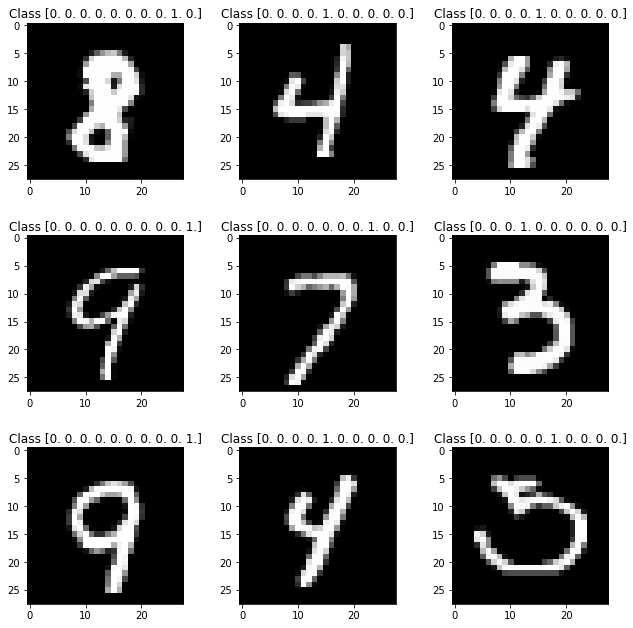

In [21]:
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

In [44]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [4 for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            if y != 0:
              print(("{:.2f}").format(y), end="  ")
            else:
              print(("{:4g}").format(y),end="  ")
        print("")

# now print!        
matprint(x_train[num] )

   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0  0.44  0.59  0.29     0  0.23  0.30  0.30  0.30  0.02     0     0     0     0     0     0     0     0     0     0 

## Build the model

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

## Train the model

In [23]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7515 - accuracy: 0.7627 - val_loss: 0.0821 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1205 - accuracy: 0.9625 - val_loss: 0.0564 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9741 - val_loss: 0.0474 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9781 - val_loss: 0.0478 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0329 - val_accuracy: 0.9905
Epoch 

## Evaluate the trained model

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02348657138645649
Test accuracy: 0.9922000169754028


In [26]:
predicted_classes = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

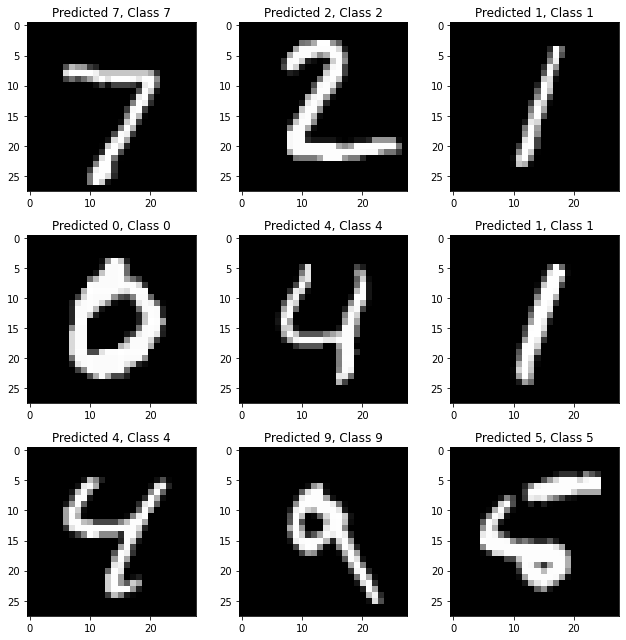

In [29]:
plt.figure()
for i, predict in enumerate(predicted_classes[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict, y_test[i]))
    
plt.tight_layout()